In [1]:
from utils import *
import sys, os
from compare_locations import compare_locations

datadir = "./data"
# preprocessed already, with 
# parallel -k python3 ../preprocessing.py ./precis_whitelist.json {1} ::: [0-7]*json


In [220]:
etaje_pixel = ["p_0-pixel-04-03-2021_15-32-38.json",
"p_1-pixel-25-02-2021_21-16-46.json",
"p_2-pixel-25-02-2021_16-27-45.json",
"p_3-pixel-04-03-2021_16-18-50.json",
"p_4-pixel-04-03-2021_16-43-50.json",
"p_5-pixel-04-03-2021_17-11-32.json",
"p_6-pixel-17-03-2021_12-52-29.json",
"p_7-pixel-17-03-2021_13-14-36.json"]

etaje_redmi = ["p_0-redmi-04-03-2021_15-31-12.json",
"p_1-redmi-25-02-2021_21-16-10.json",
"p_2-redmi-25-02-2021_16-27-08.json",
"p_3-redmi-04-03-2021_16-18-52.json",
"p_4-redmi-04-03-2021_16-43-45.json",
"p_5-redmi-04-03-2021_17-11-30.json",
"p_6-redmi-17-03-2021_12-52-29.json",
"p_7-redmi-17-03-2021_13-14-39.json"]

json_file_pixel = os.path.join(datadir, etaje_pixel[0])
collection_pixel = load_dataset_json(json_file_pixel)

json_file_redmi = os.path.join(datadir, etaje_redmi[0])
collection_redmi = load_dataset_json(json_file_redmi)

In [23]:
def Average(lst):
    return sum(lst) / len(lst)

In [277]:
def get_rssi(collection, index):
    avg_dict = {}
    if (index >= len(collection)):
        return avg_dict
    
    list = collection[index]['fingerprints']['wifi']

    for mac in list:
        avg = Average(list[mac]['rssi'])
        avg_dict[mac] = avg
        
    return avg_dict

In [84]:
def get_rssi_for_collections(collection_pixel, collection_redmi, index):
    #print('Pixel RSSI (et0 p0)')
    pixel_dict = get_rssi(collection_pixel, index)
    #print(pixel_dict)

    #print('\nRedmi RSSI (et0 p0)')
    redmi_dict = get_rssi(collection_redmi, index)
    #print(redmi_dict)
    
    print_comparison(pixel_dict, redmi_dict)

In [110]:
def print_comparison(pixel_dict, redmi_dict):
    plt.plot(*zip(*pixel_dict.items()), "+", label="pixel")
    plt.plot(*zip(*redmi_dict.items()), "x", label="redmi")
    plt.xticks(rotation='vertical')
    plt.legend(loc="upper left", fancybox=True, bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
for i in range(0, len(collection_pixel)):
    print('Punct: ' + str(i))
    #print(collection_pixel[i])
    get_rssi_for_collections(collection_pixel, collection_redmi, i)
    

In [310]:
def rssi_difference(collection_pixel, collection_redmi, index):
    pixel_dict = get_rssi(collection_pixel, index)
    redmi_dict = get_rssi(collection_redmi, index)
    
    dif_dict = {}

    for mac in pixel_dict:
        if (mac in redmi_dict):
            dif_dict[mac] = pixel_dict[mac] - redmi_dict[mac]
        else:
            dif_dict[mac] = -95.0
        
    return dif_dict
    

In [214]:
def print_dif(dif_dict):
    plt.bar(*zip(*dif_dict.items()))
    plt.xticks(rotation='vertical')
    plt.show()

Punct: 0


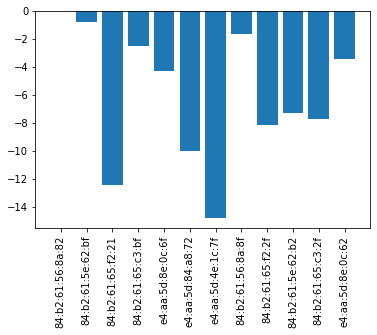

Punct: 1


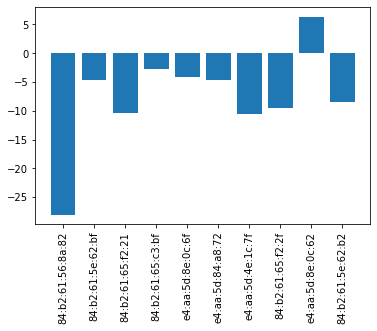

Punct: 2


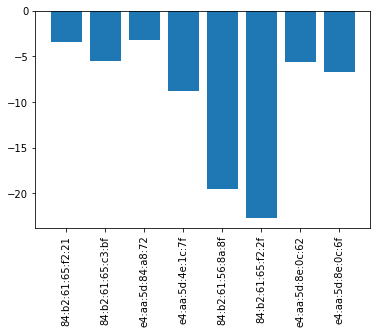

Punct: 3


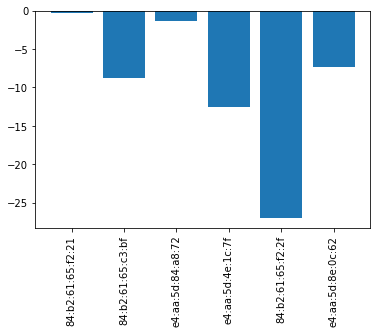

Punct: 4


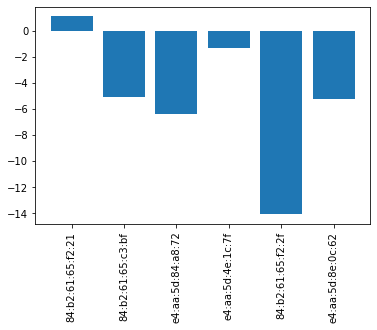

Punct: 5


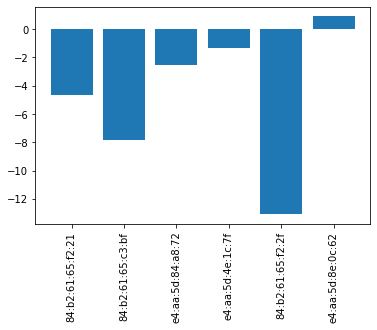

Punct: 6


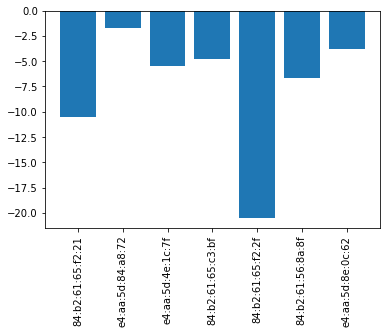

Punct: 7


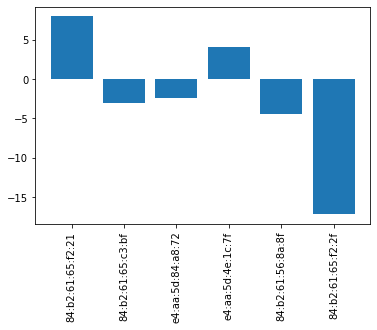

Punct: 8


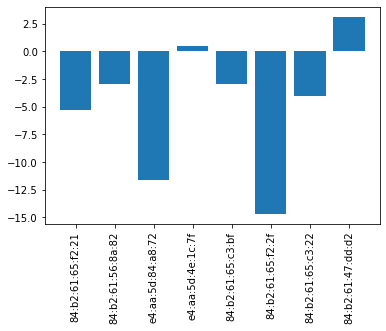

Punct: 9


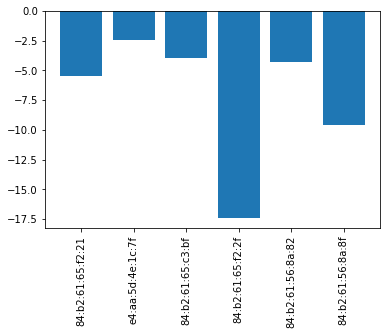

Punct: 10


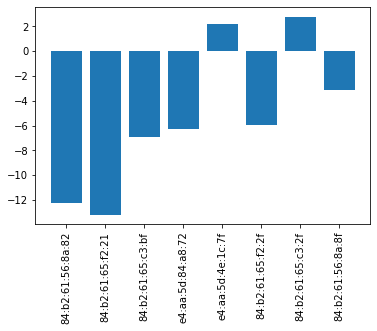

Punct: 11


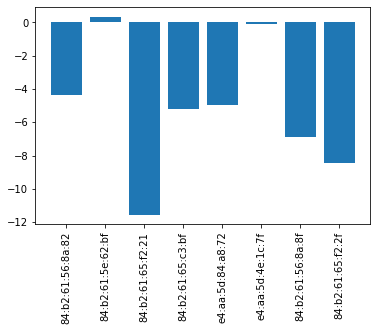

Punct: 12


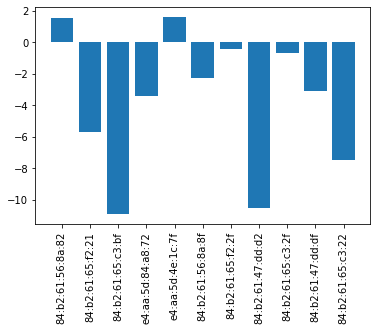

Punct: 13


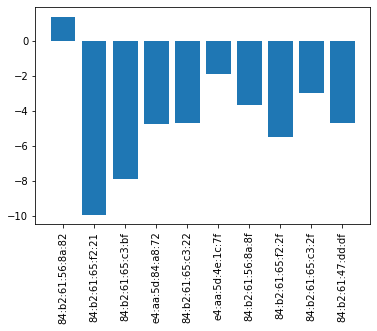

Punct: 14


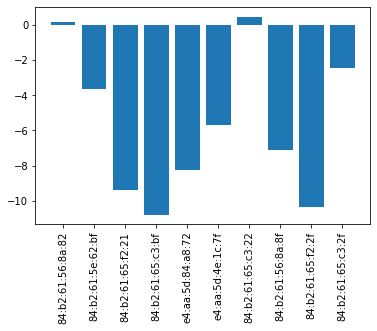

Punct: 15


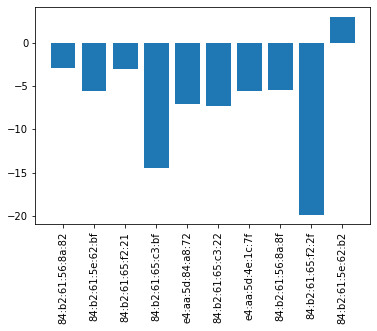

Punct: 16


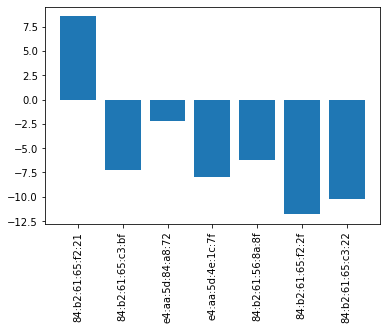

Punct: 17


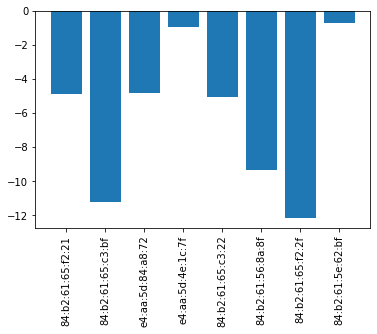

Punct: 18


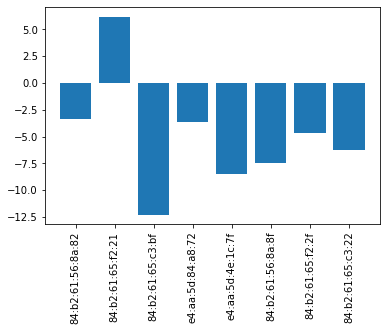

Punct: 19


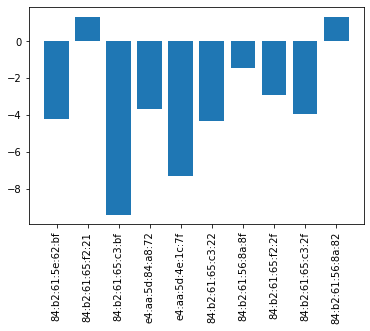

Punct: 20


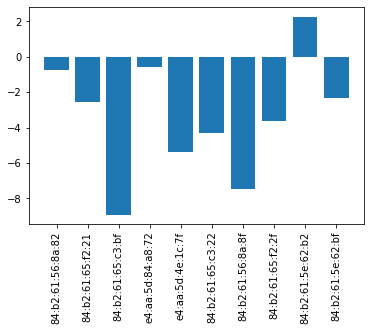

Punct: 21


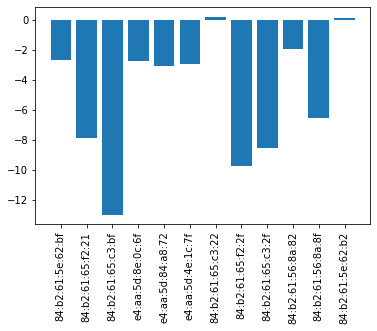

Punct: 22


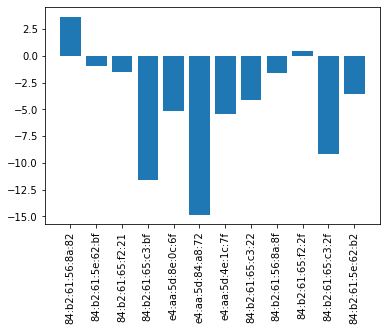

Punct: 23


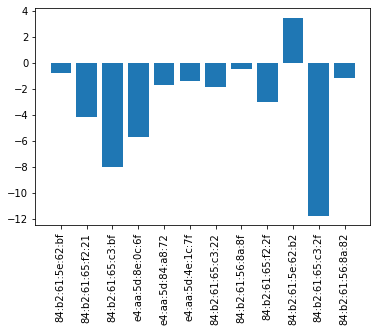

Punct: 24


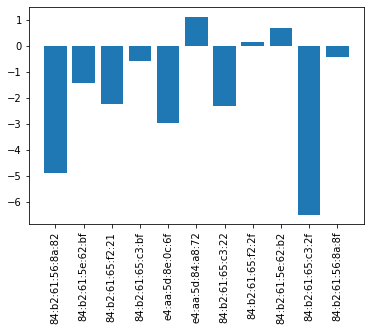

Punct: 25


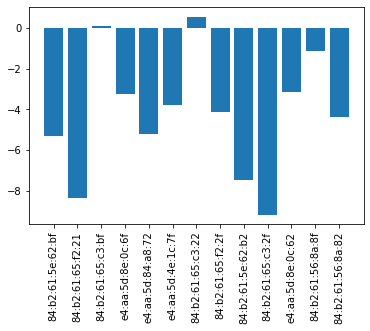

Punct: 26


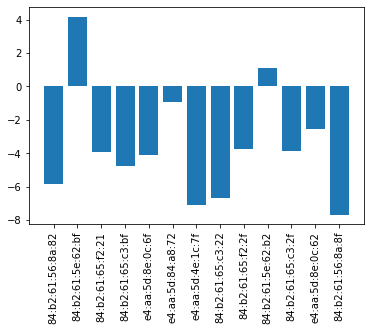

Punct: 27


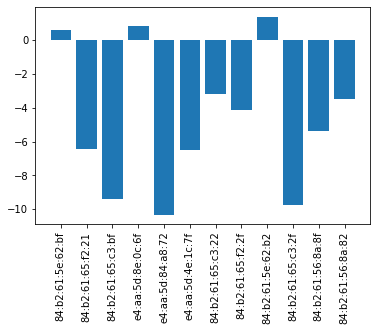

Punct: 28


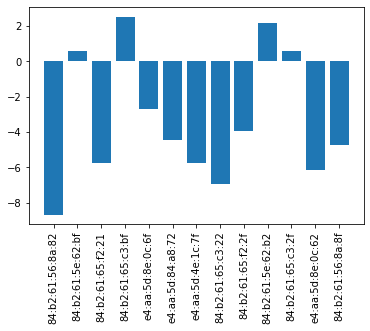

Punct: 29


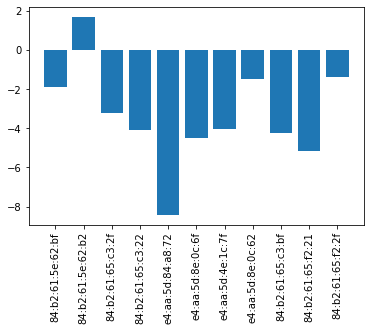

Punct: 30


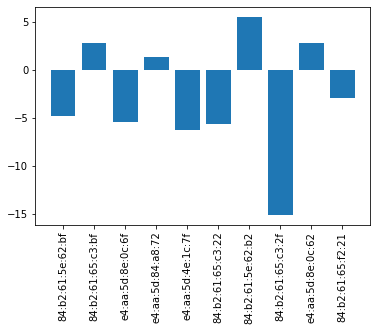

Punct: 31


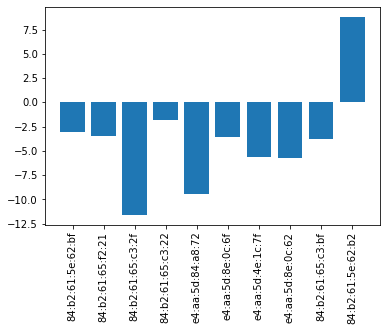

Punct: 32


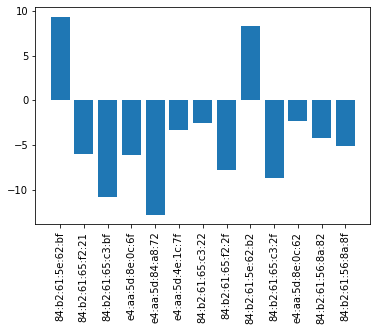

Punct: 33


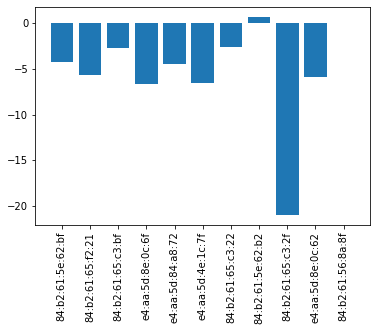

Punct: 34


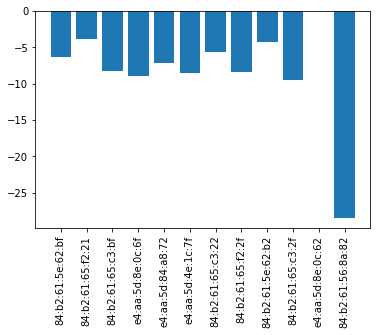

Punct: 35


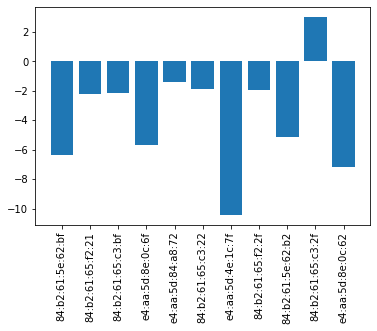

Punct: 36


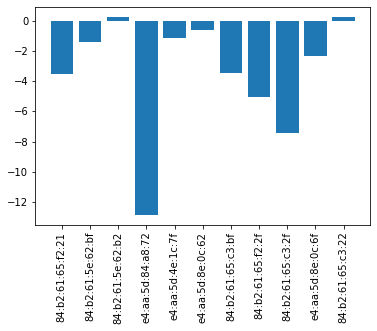

Punct: 37


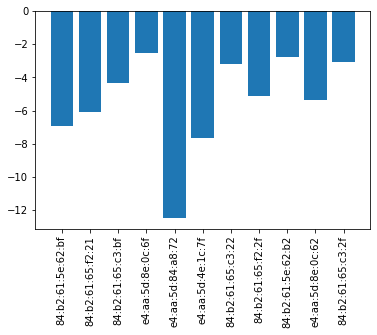

Punct: 38


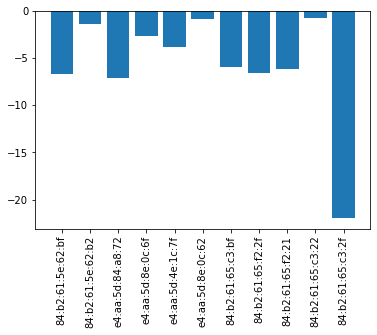

Punct: 39


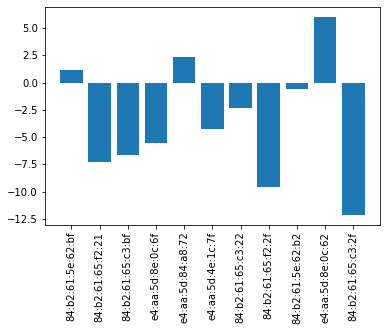

Punct: 40


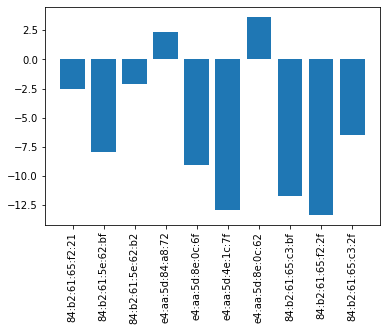

Punct: 41


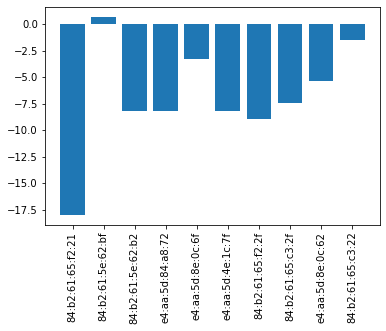

Punct: 42


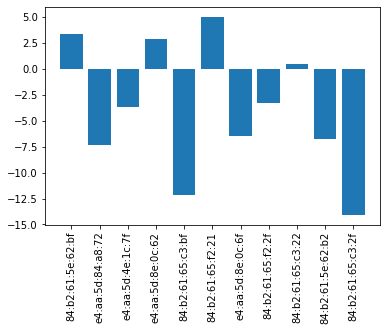

Punct: 43


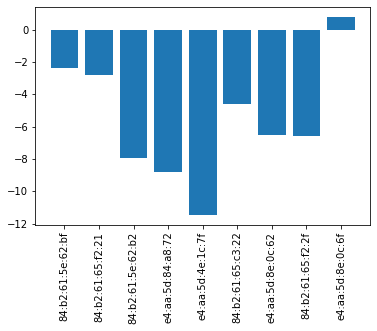

Punct: 44


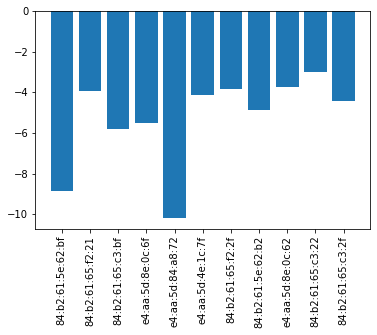

Punct: 45


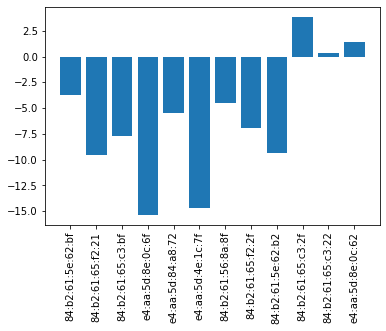

In [325]:
for i in range(0, len(collection_pixel)):
    print('Punct: ' + str(i))
    dif_dict = rssi_difference(collection_pixel, collection_redmi, i)
    print_dif(dif_dict)
    

In [270]:
def read_data(dev):
    etaje_pixel = ["p_0-pixel-04-03-2021_15-32-38.json",
    "p_1-pixel-25-02-2021_21-16-46.json",
    "p_2-pixel-25-02-2021_16-27-45.json",
    "p_3-pixel-04-03-2021_16-18-50.json",
    "p_4-pixel-04-03-2021_16-43-50.json",
    "p_5-pixel-04-03-2021_17-11-32.json",
    "p_6-pixel-17-03-2021_12-52-29.json",
    "p_7-pixel-17-03-2021_13-14-36.json"]

    etaje_redmi = ["p_0-redmi-04-03-2021_15-31-12.json",
    "p_1-redmi-25-02-2021_21-16-10.json",
    "p_2-redmi-25-02-2021_16-27-08.json",
    "p_3-redmi-04-03-2021_16-18-52.json",
    "p_4-redmi-04-03-2021_16-43-45.json",
    "p_5-redmi-04-03-2021_17-11-30.json",
    "p_6-redmi-17-03-2021_12-52-29.json",
    "p_7-redmi-17-03-2021_13-14-39.json"]

    pixel_array = []
    redmi_array = []
    total_array = []

    for i in range(0, 8): 
        #print('\nEtaj ' + str(i))
        json_file_pixel = os.path.join(datadir, etaje_pixel[i])
        collection_pixel = load_dataset_json(json_file_pixel)

        json_file_redmi = os.path.join(datadir, etaje_redmi[i])
        collection_redmi = load_dataset_json(json_file_redmi)
        
        if (dev == "pixel"):
            total_array = total_array + build_dif_array(collection_pixel, collection_redmi)
        elif (dev == "redmi"):
            total_array = total_array + build_dif_array(collection_redmi, collection_pixel)

    return total_array


In [326]:
def rssi_difference_array(collection1, collection2, index): #collection1 - collection2
    dict1 = get_rssi(collection1, index)
    dict2 = get_rssi(collection2, index)
    
    dif_array = [-100 for i in range(len(dict1))]
    i = 0

    for mac in dict1:
        if (mac in dict2):
            dif_array[i] =  dict1[mac] - dict2[mac]
        #else:
            #dif_array[i] = 95.0
            i = i + 1
    
    #print('Punct '+str(index)+': '+str(dif_array)+'\n\n')
    return dif_array
    

In [338]:
def print_dif_hist(dif_array_total, title):
    b = np.arange(-40, 40, 5)  
    bin_width = b[1] - b[0]
    hist_away, bins_out = np.histogram(dif_array_total, b, density=False)
    #hist_away = hist_away / len(dif_array_total)
    print(hist_away)
    print(bins_out)
    
    fig = plt.figure()
    plt.bar(b[:-1], hist_away, width=bin_width, ec='k', alpha=0.8)
    plt.xlabel("RSSI difference (dBm)")
    plt.ylabel("PMF")
    plt.xticks(ticks=b, rotation='vertical')
    plt.title(title)
    plt.show()

In [263]:
def build_dif_array(collection1, collection2):
    dif_array_total = []
    for i in range(0, len(collection1)):
        dif_array_total = dif_array_total + rssi_difference_array(collection1, collection2, i)

    #print(dif_array_total)
    return dif_array_total

[   0    1    5   14   28  230 1415 1886  417   54   10    2    0    1
    1]
[-40 -35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


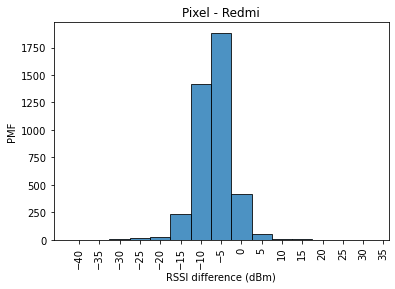

[   0    1    1    0    2   10   52  401 1879 1428  242   28   14    5
    1]
[-40 -35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


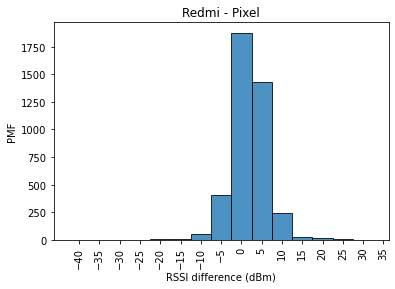

In [339]:
total_array = read_data("pixel")
print_dif_hist(total_array, "Pixel - Redmi")

total_array = read_data("redmi")
print_dif_hist(total_array, "Redmi - Pixel")